<a href="https://colab.research.google.com/github/ErigiVaishnavi/Early-Warning-Prediction-of-Environmental-Parameters/blob/main/SARIMAX_CO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
# Load dataset
January = pd.read_csv("/content/january_2024_co2_data.csv")
December=pd.read_csv("/content/Hutti_LoRawan_v3_merged.csv")


#combining Data
# Concatenate the one-month dataset with the existing 8 days of data
data = pd.concat([December, January])

In [ ]:
# Preprocessing
data['DateTime'] = pd.to_datetime(data['DateTime'])
data.set_index('DateTime', inplace=True)

<Axes: xlabel='DateTime'>

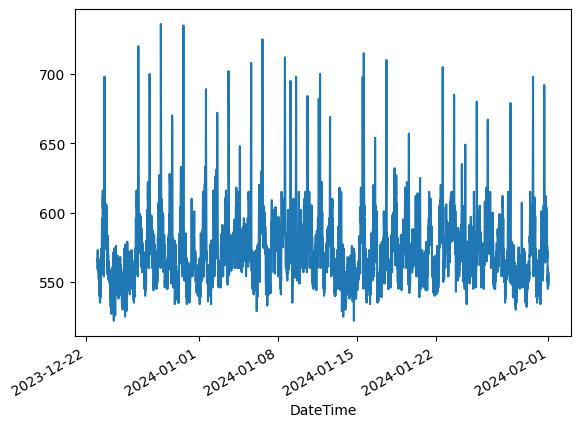

In [ ]:
data['CO2'].plot()

In [ ]:
# Select CO2 for prediction
co2_data = data['CO2']


In [ ]:
# Dickey-Fuller test for stationarity
def adfuller_test(timeseries):
  print('Dickey-Fuller Test:')
  df_test = adfuller(timeseries, autolag='AIC')
  df_result = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used'])
  print(df_result)

warnings.filterwarnings('ignore')  # suppress warnings
adfuller_test(co2_data)
warnings.filterwarnings("default")  # reset warnings

Dickey-Fuller Test:
Test Statistic                -9.960068e+00
p-value                        2.386616e-17
# Lags Used                    3.500000e+01
Number of Observations Used    1.135600e+04
dtype: float64


In [ ]:
# Define training and test sets
train_size = len(co2_data) - 3
train, test = co2_data[:train_size], co2_data[train_size:]

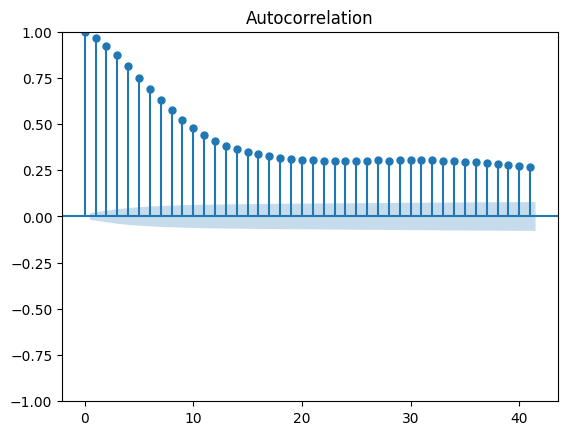

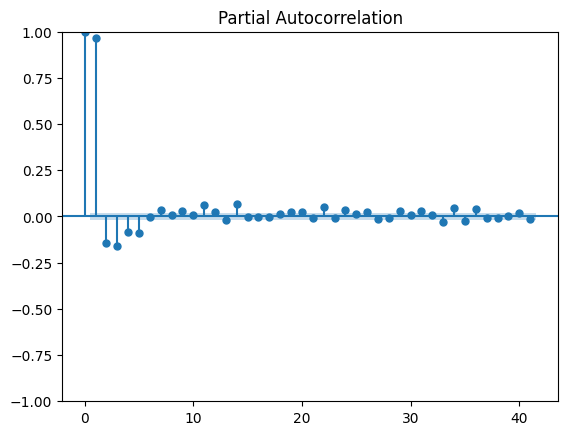

In [ ]:
plot_acf(data['CO2'])
plt.show()
plot_pacf(data['CO2'])
plt.show()

In [ ]:
# Define and fit the SARIMA model (adjust order parameters as needed)
model = sm.tsa.statespace.SARIMAX(train, order=(5, 0, 2), seasonal_order=(1, 1, 1, 6))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/multi.py:643: DeprecationWarning: `cumproduct` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `cumprod` instead.
  codes = cartesian_product(codes)
/usr/local/lib/python3.10/dist-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/multi.py:643: D

In [ ]:

forecast = model_fit.get_forecast(steps=len(test))

predicted_values = forecast.predicted_mean

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Print results
print("Predicted CO2 values")
print(predicted_values)

Predicted CO2 values
11389    549.788207
11390    550.278105
11391    551.706692
Name: predicted_mean, dtype: float64


In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(test, predicted_values)
print("Mean squared error: %.3f" % mse)
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test, predicted_values)

# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(actual, predicted):
    return mean_absolute_percentage_error(actual, predicted) * 100

mape = calculate_mape(test, predicted_values)
print("MAE:", mae)
print("MAPE:", mape)
# Calculate R-squared
r_squared = r2_score(test, predicted_values)
print("R-squared: %.3f" % r_squared)

Mean squared error: 9.280
MAE: 2.7865398400964523
MAPE: 0.5049035594040273
R-squared: 0.377


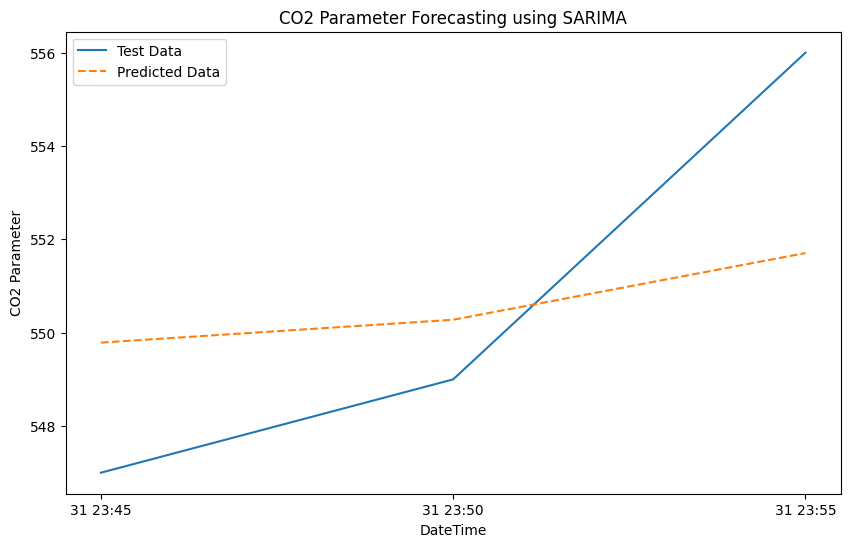

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, predicted_values, label='Predicted Data', linestyle='--')
plt.title('CO2 Parameter Forecasting using SARIMA')
plt.xlabel('DateTime')
plt.ylabel('CO2 Parameter')
plt.legend()
plt.show()

<ipython-input-58-1ca28557ea26>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  extended_co2_data = pd.Series(index=extended_dates)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


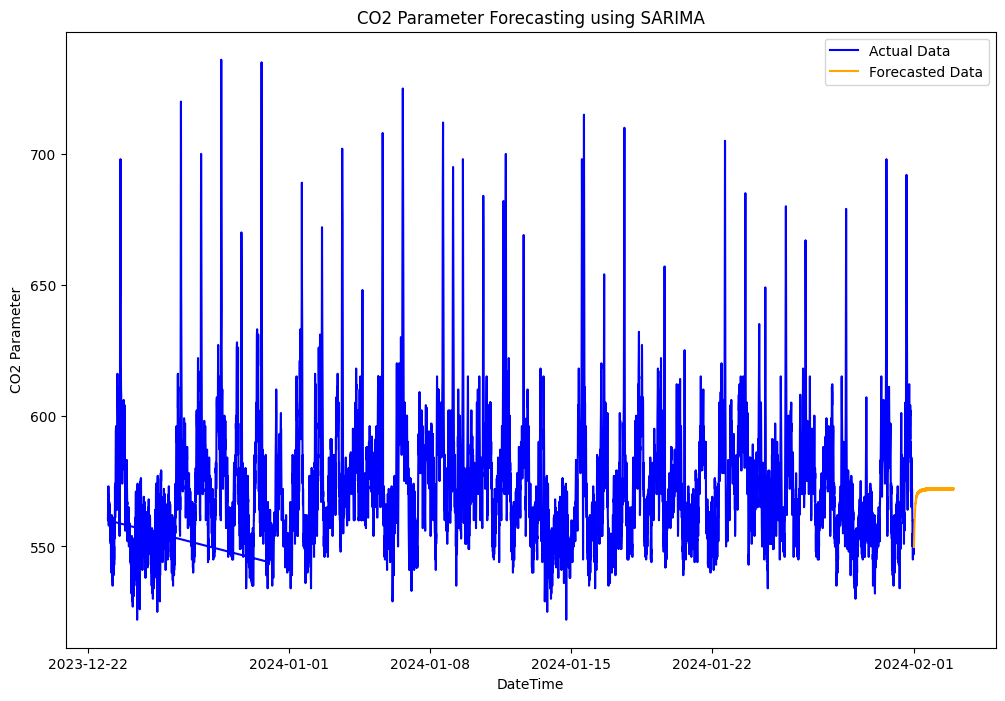

In [ ]:
# Extend the dataset by 2 days
extended_dates = pd.date_range(start='2024-02-01 00:00:00', end='2024-02-02 23:00:00', freq='5T')
extended_co2_data = pd.Series(index=extended_dates)

# Forecast CO2 for the extended period
forecast = model_fit.get_forecast(steps=len(extended_co2_data))
forecasted_values = forecast.predicted_mean

# Plot actual vs predicted values for the extended period with increased plot size
plt.figure(figsize=(12, 8))
plt.plot(co2_data.index, co2_data, label='Actual Data', color='blue')
plt.plot(extended_co2_data.index, forecasted_values, label='Forecasted Data', color='orange')
plt.title('CO2 Parameter Forecasting using SARIMA')
plt.xlabel('DateTime')
plt.ylabel('CO2 Parameter')
plt.legend()
plt.show()

In [ ]:
# Forecast CO2 for the next 2 days
forecast = model_fit.get_forecast(steps=48 * 2)  # 48 timestamps per day, forecasting for 2 days
forecasted_values_2_days = forecast.predicted_mean

# Print the forecasted CO2 for the next 2 days
print("Forecasted CO2 for the next 2 days:")
print(forecasted_values_2_days)

Forecasted CO2 for the next 2 days:
11101    549.647255
11102    550.353950
11103    551.223348
11104    552.245073
11105    553.194628
            ...    
11192    573.106169
11193    573.086296
11194    573.136446
11195    573.149442
11196    573.127563
Name: predicted_mean, Length: 96, dtype: float64
